# **Problem Statement** : Titanic Survival Prediction

We will use the classic Titanic dataset. The data consists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers

# **Importing important libraries**

In [1]:
#data wrangling
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt


import warnings

# Suppress a specific warning
warnings.filterwarnings("ignore")

import missingno

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from sklearn.metrics import roc_curve, auc

# **Reading Data Set**




In [ ]:
data=pd.read_csv('tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **EDA {Exploratory Data Analysis}**

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
print("training shape :", data.shape)

training shape : (418, 12)


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Categorical Variables

**Gender distribution**

In [ ]:
#value counts of sex column

data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
#value count of survival

data["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Numerical Features distribution

In [ ]:
#value counts of Pclass column

data["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
#Mean of survival by passenger class

data[["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


#**Data Visualisation**

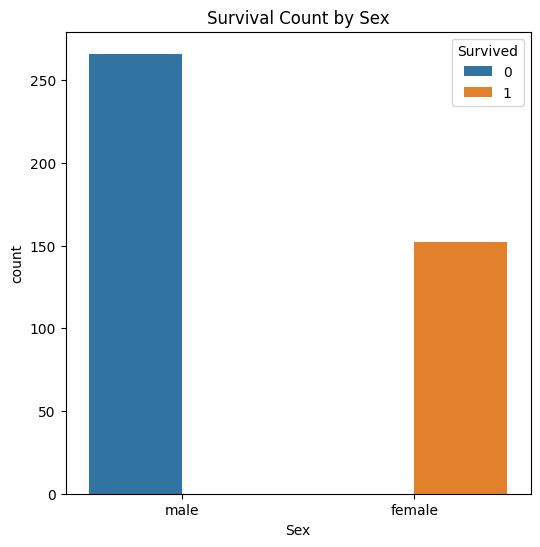

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=data, hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

Text(0.5, 1.0, 'Survival probability by Passenger class')

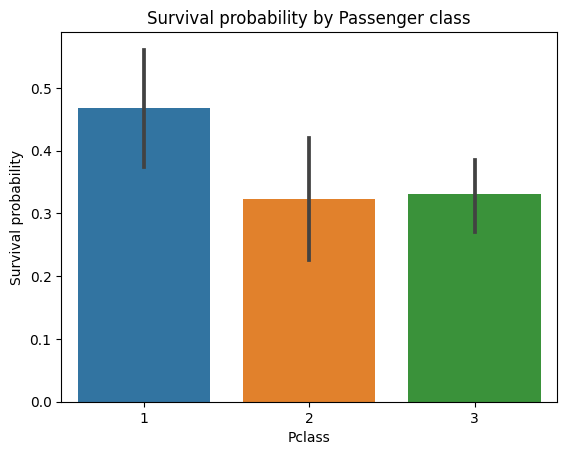

In [ ]:
#visualisation

sns.barplot(x="Pclass",y="Survived",data=data)
plt.ylabel("Survival probability")
plt.title("Survival probability by Passenger class")

<Axes: >

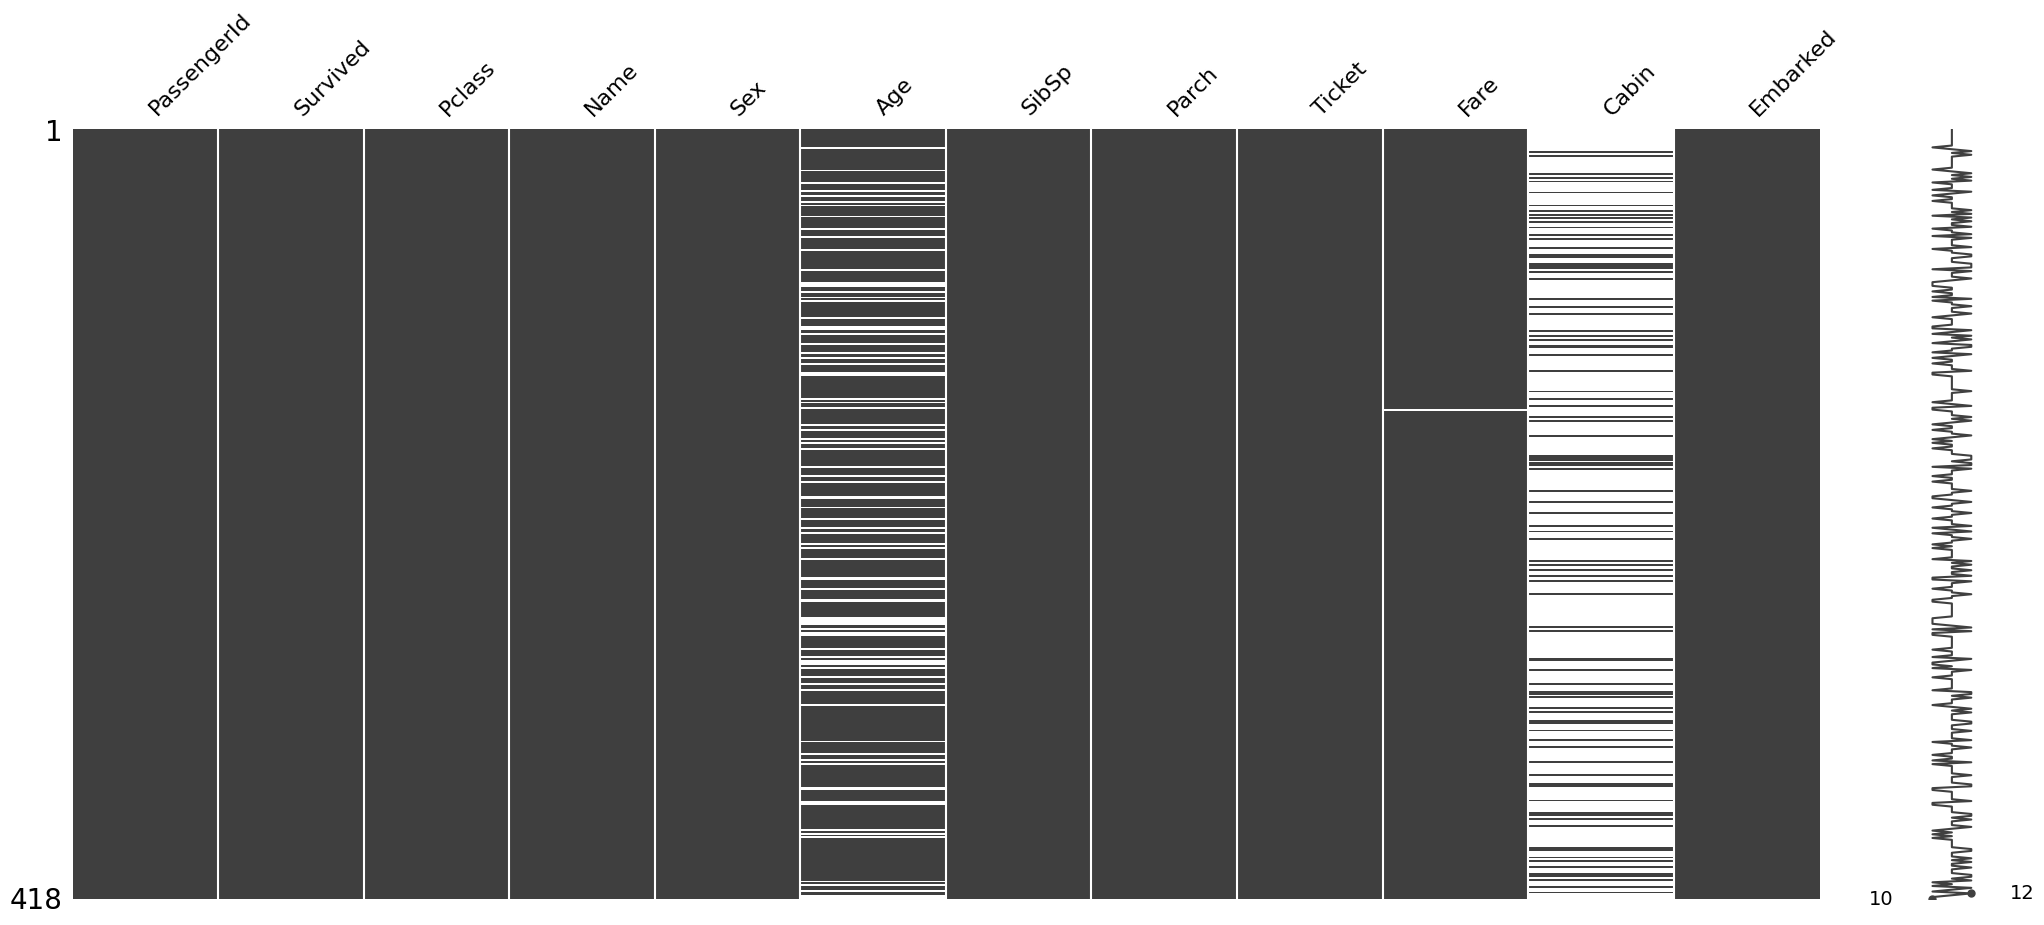

In [ ]:
#Missing data in  training set
missingno.matrix(data)

**Histograms:**

Plot histograms to visualize the distribution of numerical variables like Age

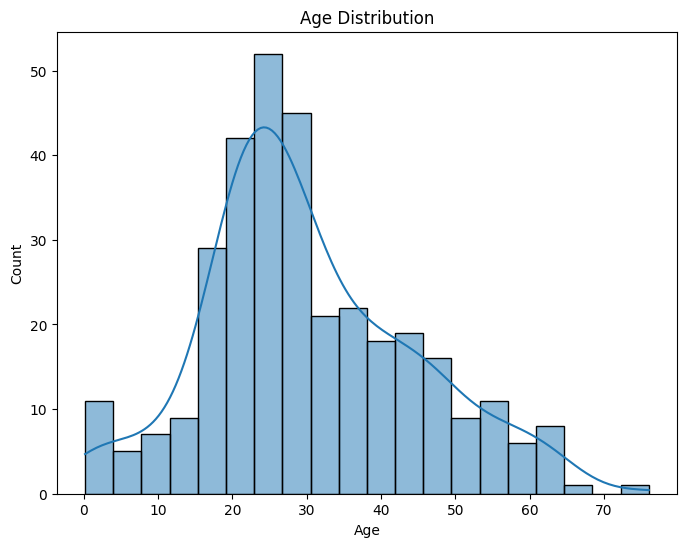

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Box Plots:**

Use box plots to visualize the spread of numerical variables across different survival groups.

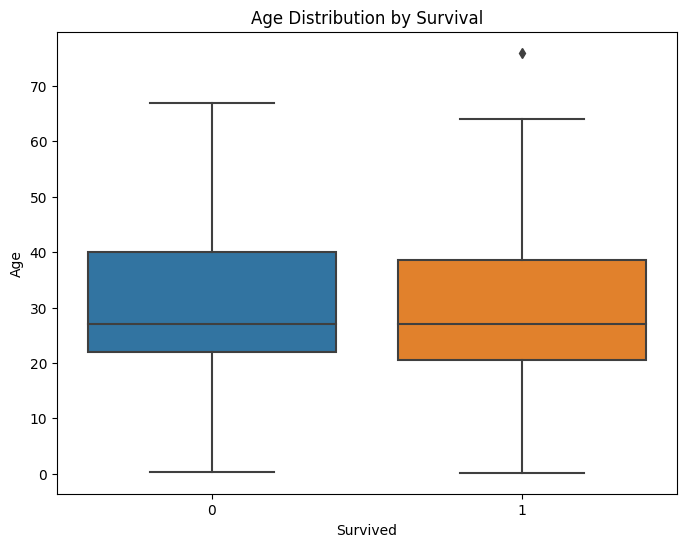

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

**Correlation Heatmap:**

Visualize the correlation between numerical variables using a heatmap.

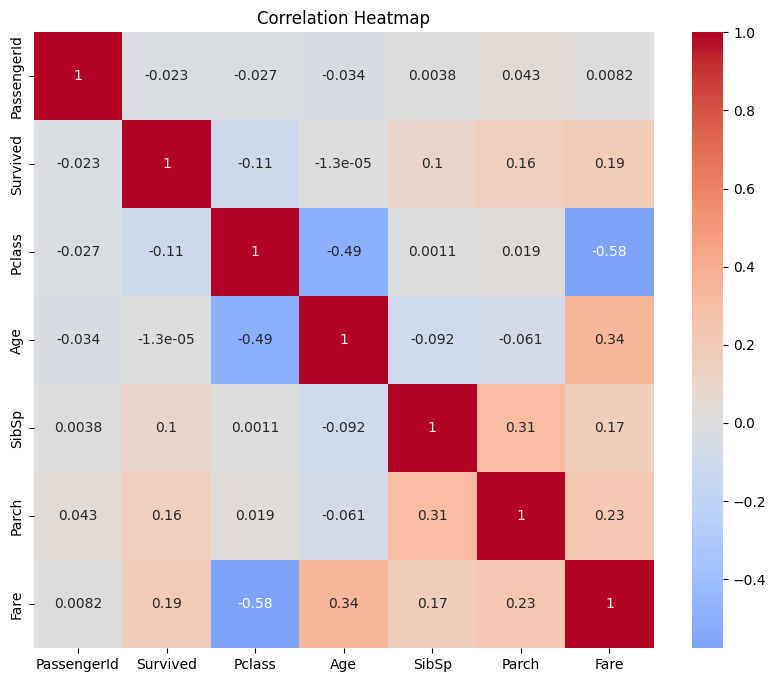

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

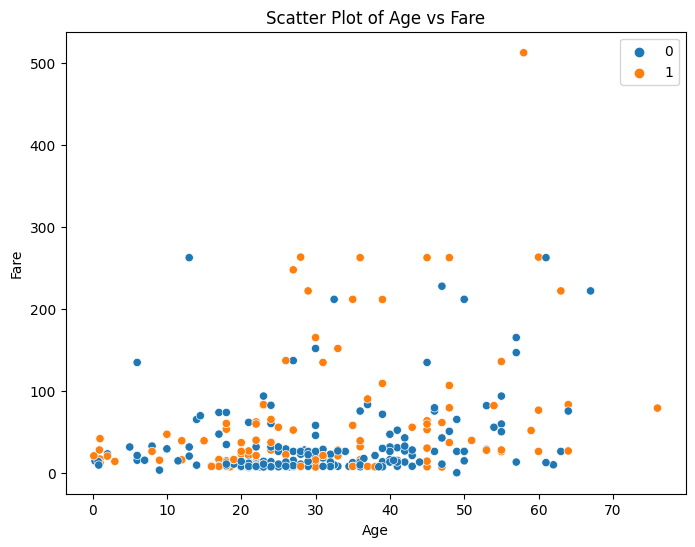

In [ ]:
# Scatter plot: Age vs Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

# **Data Preprocessing**

**Some general steps of data preprocessing :**

* Data Cleaning
* Feature Selection
* Feature Engineering
* Data Transformation
* Feature Scaling
* Handling Categorical Data
* Pipeline
* ColumnTransformer

In [ ]:
#Important features

features=['Pclass','SibSp','Sex','Parch','Embarked']

X=data[features]
y=data['Survived']

In [ ]:
X.shape

(418, 5)

In [ ]:
y.shape

(418,)

In [ ]:
numerical_features=['Pclass','Parch','SibSp']
categorical_features=['Embarked','Sex']

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [ ]:
#applying preprocessing steps on training data
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
#splitting the train dataset for validation (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# **Model with Hyper Parameter tuning**

In [ ]:
#Logistic Regression Model
baseline_model = LogisticRegression()

#Hyperparameter tuning
param_grid = {
    'C': [ 0.1, 0.5, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2']  #  Regularization type ('l1' = Lasso, 'l2' = Ridge)
}
grid_search = GridSearchCV(baseline_model, param_grid, cv=7)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_

# Model evaluation
y_pred = baseline_model.predict(X_test)

print(baseline_model.score(X_train,y_train))
print(baseline_model.score(X_test,y_test))

1.0
1.0


**Model Evaluation**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: On Baseline Model")
print(conf_matrix)

Confusion Matrix: On Baseline Model
[[50  0]
 [ 0 34]]


In [ ]:
print("Classification Report: On Baseline Model")
print(classification_report(y_test, y_pred))

Classification Report: On Baseline Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



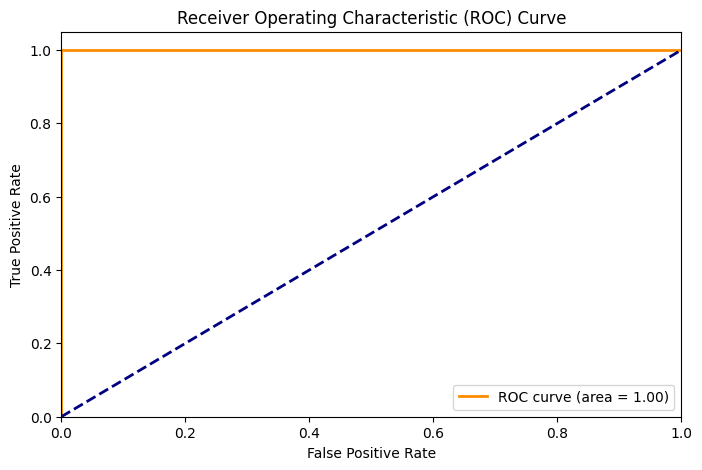

In [ ]:
# Get predicted probabilities for the positive class
y_probs = baseline_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest
1.0


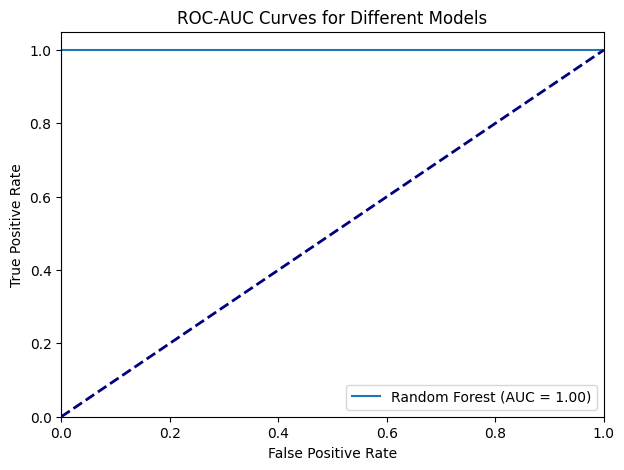

Gradient Boosting
1.0


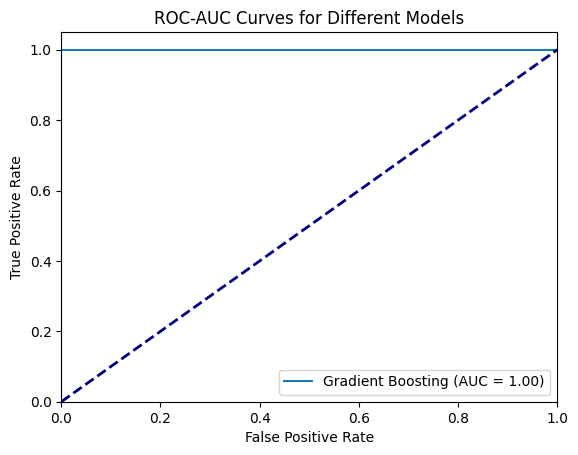

SVC
1.0


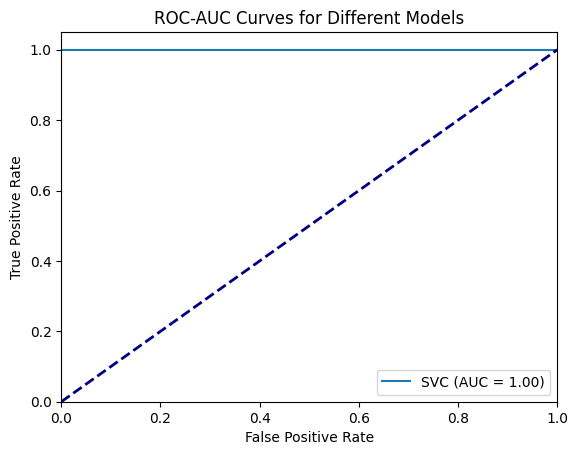

K Nearest Neighbors
0.9880952380952381


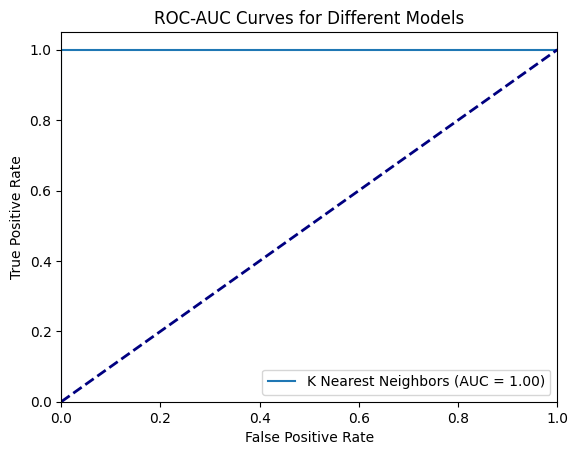

Decision Tree
1.0


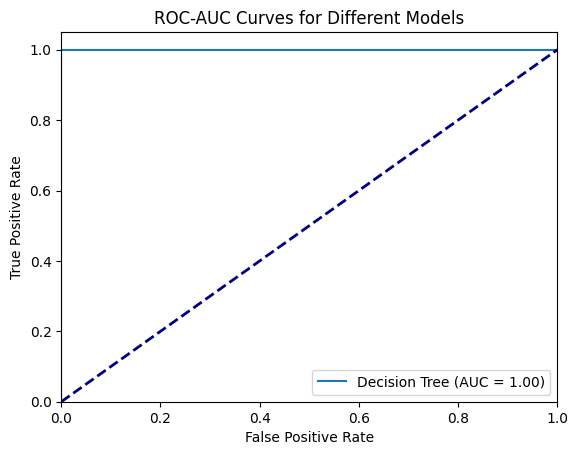

Multi-layer Perceptron
1.0


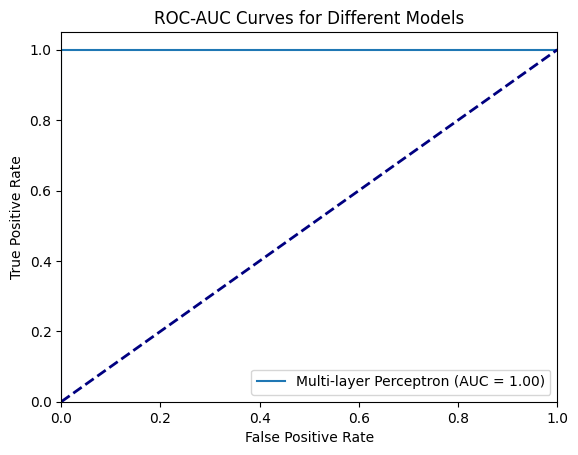

AdaBoost
1.0


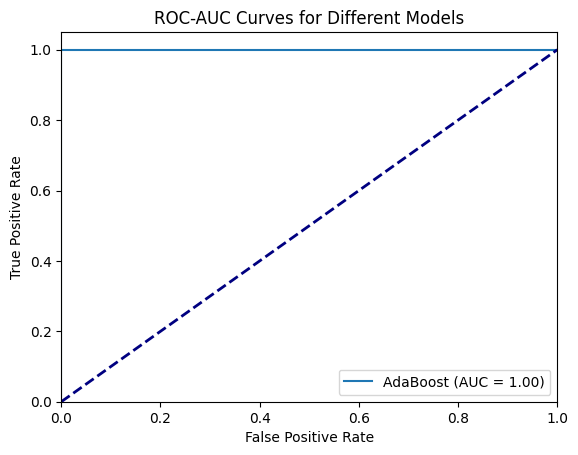

In [ ]:

# Initialize and train different classification models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    # Add more models here
}

plt.figure(figsize=(7, 5))

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curves for Different Models')
    plt.legend(loc="lower right")
    plt.show()


# **Conclusion**

After trying different models, we can conclude that appropriate data preprocessing steps increased the performances of models.
Giving accuracy as well as roc auc score of 100% .